In [1]:
import sys,os
os.chdir('../../')
sys.path.append('./src/data')
sys.path.append('./src/events')
sys.path.append('./src/probability')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from functions import nufit_params_nsi, r_earth
from numerical import P_num_over_E
from analytical import P_an
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{siunitx}')
np.set_printoptions(linewidth=200)
from src.plotter import savethesis

In [3]:
E_range = np.logspace(0,3,500)
#P = P_num_over_E(flavor_from='m', E = E_range, params=nufit_params_nsi)

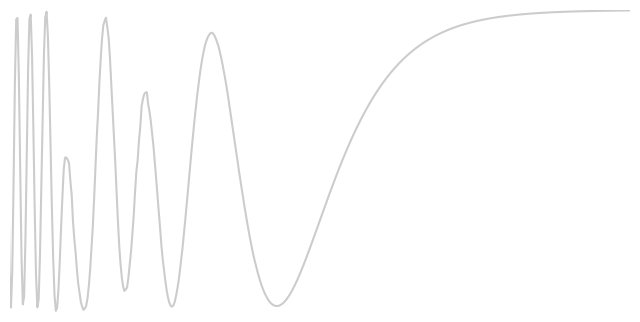

In [52]:
plt.plot(E_range,P[1],c='k', alpha=0.2)
plt.xlim((1.5, E_range.max()))
plt.ylim((0,1))
plt.xscale('log')
plt.axis('off')
plt.savefig("./thesis/tex/figures/pretty_osc.pdf", bbox_inches='tight')

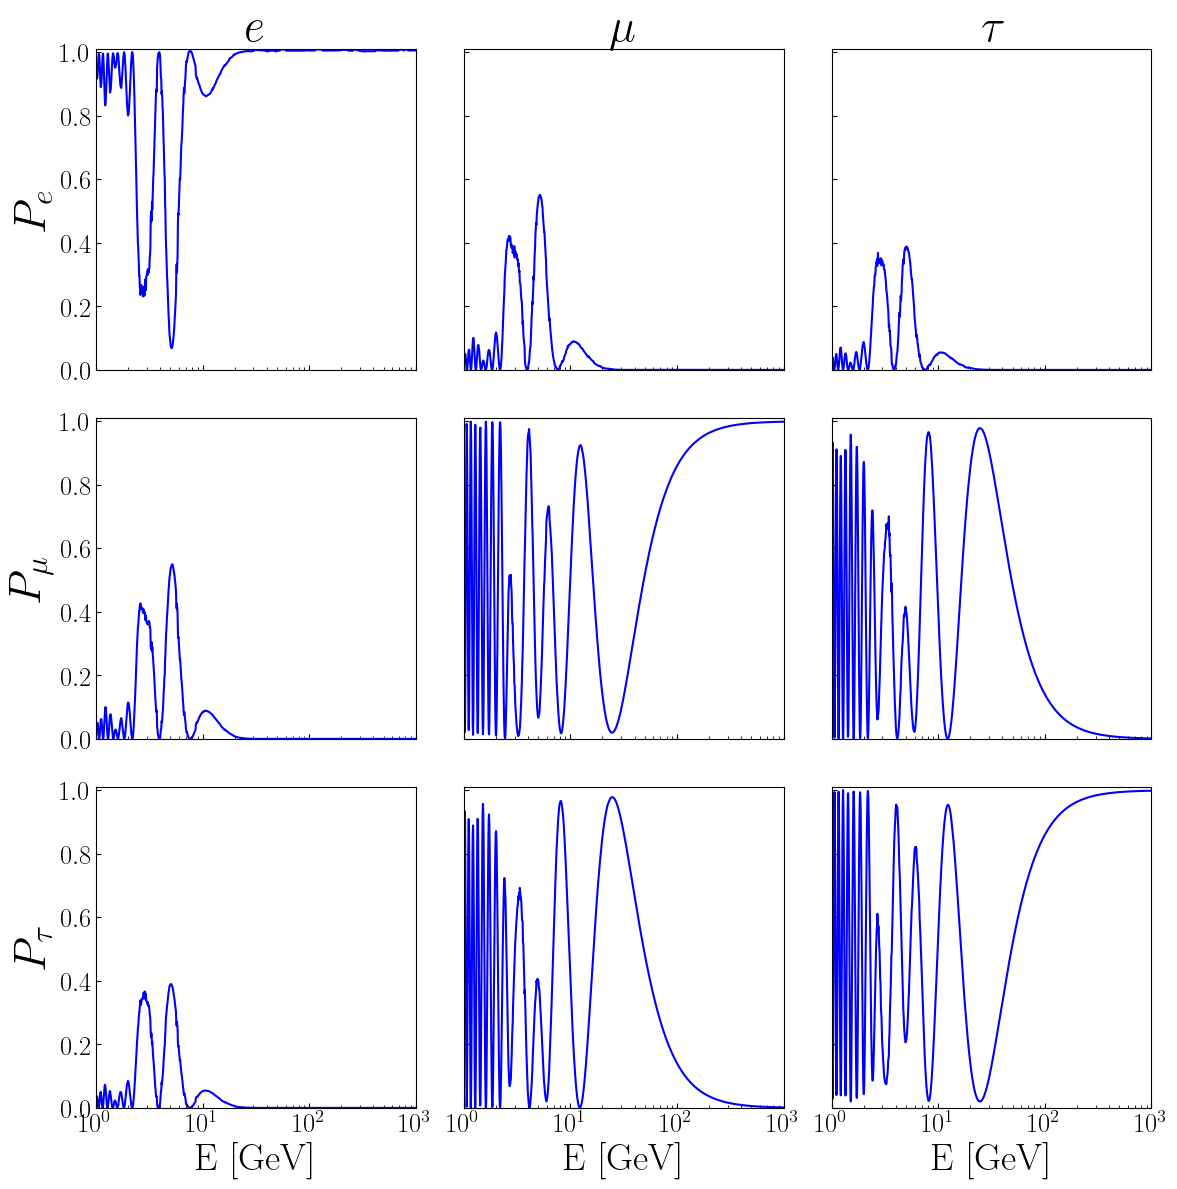

In [14]:
flavor_from_list = ['e','m','t']
flavor_to_list = ['e','m','t']
flavor_list = [r'e',r'\mu',r'\tau']
styles = ['solid','dotted','dashed']
colors = ['blue','red','green']
ncols= len(flavor_from_list)
nrows = len(flavor_to_list)
E_range= np.logspace(0,3,1000)
fig, ax = plt.subplots(nrows,ncols, sharex=True, sharey=True, figsize=(12,12))
for col,flavor_from in enumerate(flavor_from_list):
    ax[0,col].set_title(f'${flavor_list[col]}$', fontsize=33)
    ax[2,col].set_xlabel(r'E [GeV]', fontsize=27)
    for row,flavor_to in enumerate(flavor_to_list):
        y = P_num_over_E(flavor_from=flavor_from, E = E_range, params=nufit_params_nsi)
        #x_an,y_an = P_an(flavor_from, flavor_to, param, E, L,  param_min, param_max, material,earth_start, ndim)
        #ax[col,row].plot(x_an,y_an, linestyle=styles[0])
        ax[row,col].plot(E_range,y[row].reshape(-1), linestyle=styles[0], c='b')
        ax[row,col].set_xlim((E_range.min(),E_range.max()))
        ax[row,col].set_xscale('log')
        ax[row,col].set_ylim((0,1.01))
        ax[row,0].set_ylabel(f'$P_{flavor_list[row]}$', fontsize=33)
        ax[row,col].tick_params(axis='both', direction='in', which='both', labelsize=19)
plt.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=0.15)
savethesis(fig, 'oscillations')

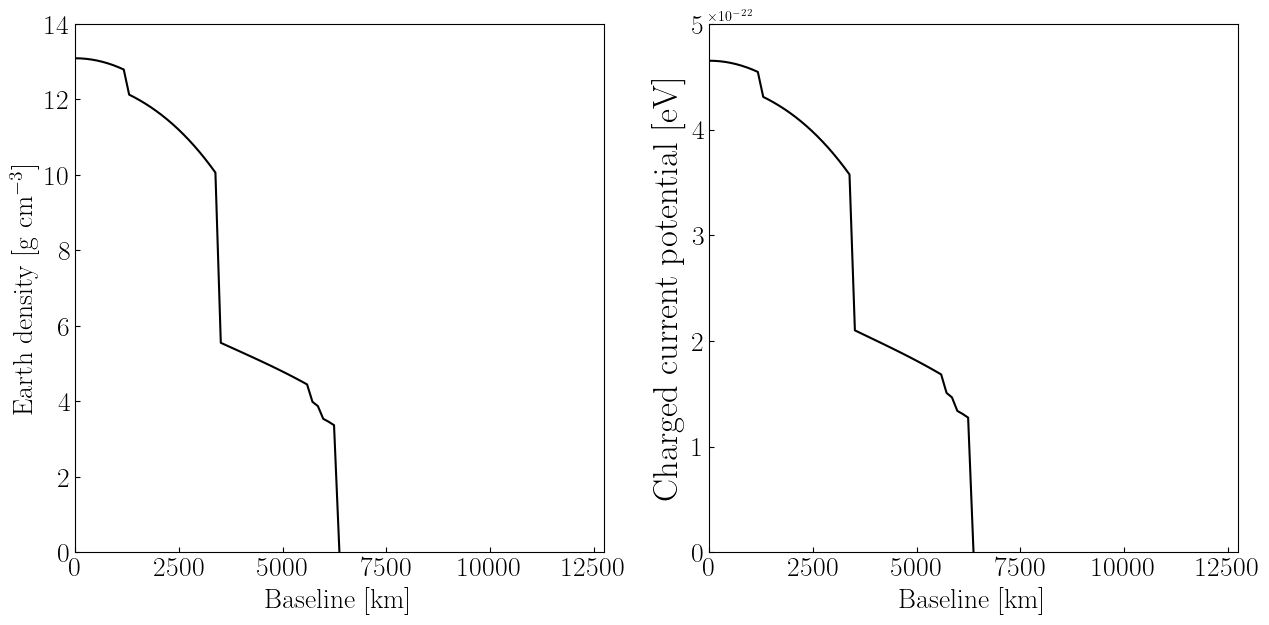

In [16]:
from functions import rho_earth,V
fig,ax = plt.subplots(1,2, figsize=(15,7))
L_range = np.linspace(0,r_earth,50)
ax[0].plot(L_range, rho_earth(L_range), c='k')
ax[0].set_xlabel('Baseline [km]', fontsize=20)
ax[0].set_ylabel(r'Earth density [$\mathrm{g\,\, cm^{-3}}$]', fontsize=20)
ax[0].tick_params(axis='both', direction='in', which='both', labelsize=20)

ax[1].plot(L_range, [V(L)[0] for L in L_range], c='k')
ax[1].set_xlabel('Baseline [km]', fontsize=20)
ax[1].set_ylabel(r'Charged current potential [eV]', fontsize=25)
ax[1].tick_params(axis='both', direction='in', which='both', labelsize=20)
ax[0].set_xlim((0,2*r_earth))
ax[0].set_ylim((0,14))
ax[1].set_xlim((0,2*r_earth))
ax[1].set_ylim((0,5e-22))
savethesis(fig,'potential')

<ipython-input-50-59a7967f3dc1>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax[row,col].pcolormesh(z_range,E_range,y.T, rasterized=True, vmin=0, vmax=1)


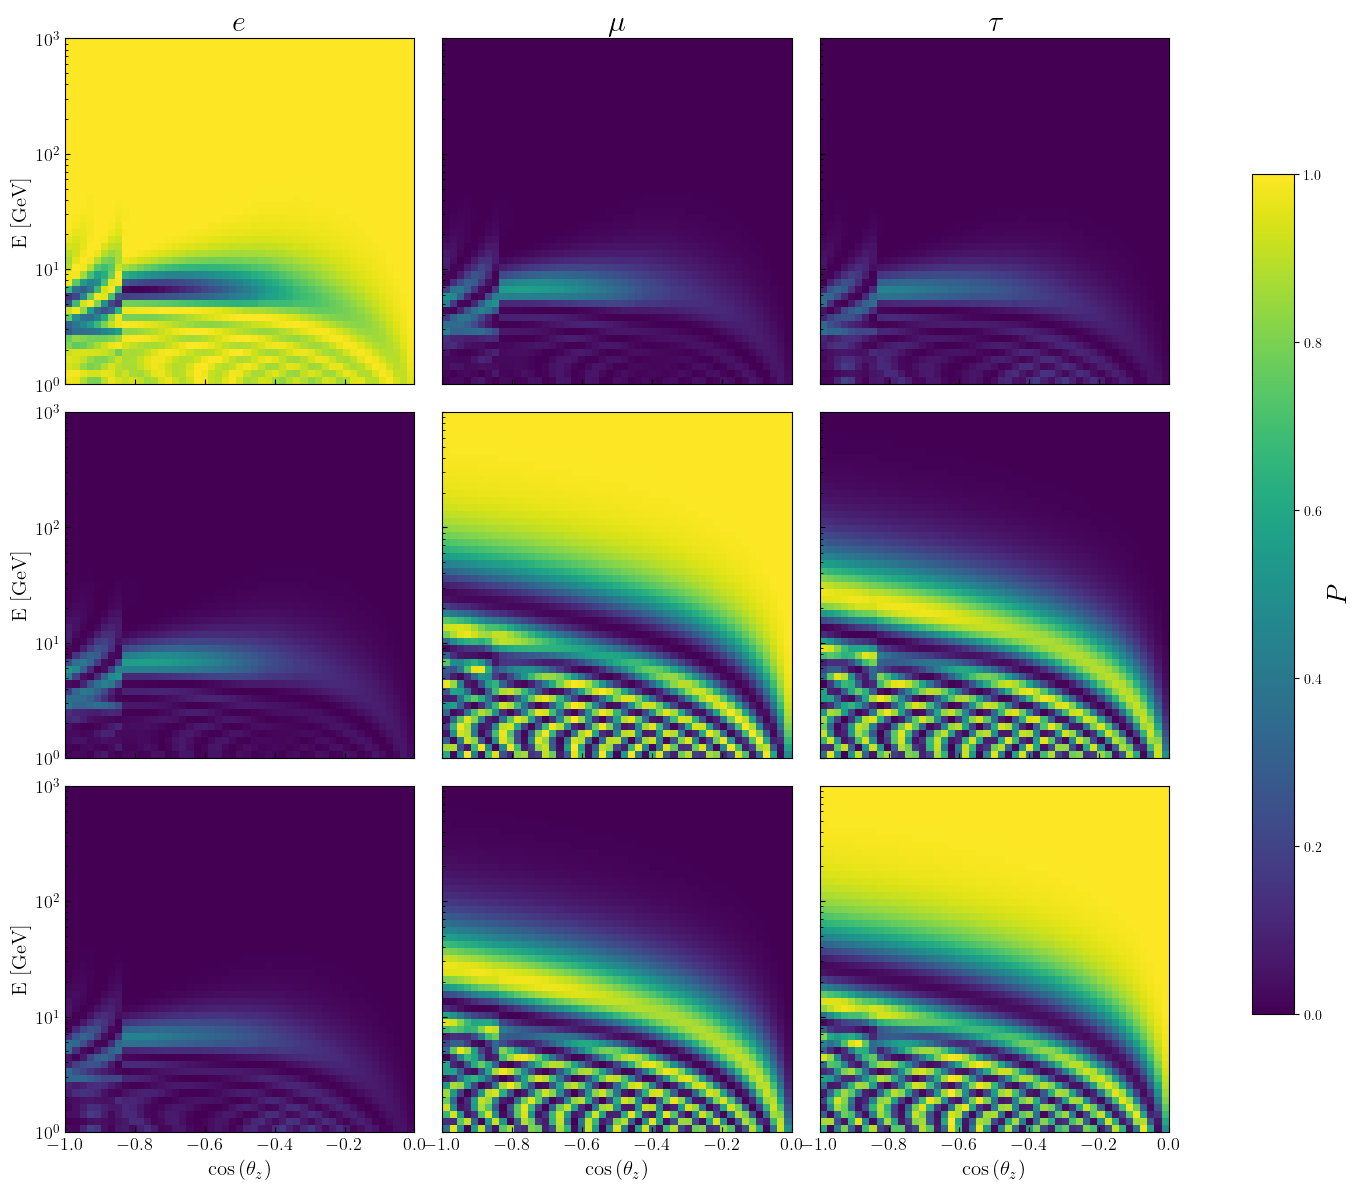

In [50]:
flavor_from_list = ['e','m','t']
flavor_to_list = ['e','m','t']
flavor_list = [r'e',r'\mu',r'\tau']
styles = ['solid','dotted','dashed']
colors = ['blue','red','green']
ncols= len(flavor_from_list)
nrows = len(flavor_to_list)
E_range= np.logspace(0,3,50)
z_range= np.linspace(-1,0,50)
fig, ax = plt.subplots(nrows,ncols, sharex=True, sharey=True, figsize=(12,12))
for col,flavor_from in enumerate(flavor_from_list):
    ax[0,col].set_title(f'${flavor_list[col]}$', fontsize=22)
    for row,flavor_to in enumerate(flavor_to_list):
        y_list = []
        for z in z_range:
            y = P_num_over_E(flavor_from=flavor_from, E = E_range, zenith=z ,params=nufit_params_nsi)
            y_list.append(y[row])
        y = np.array(y_list).reshape(50,50)
        #x_an,y_an = P_an(flavor_from, flavor_to, param, E, L,  param_min, param_max, material,earth_start, ndim)
        #ax[col,row].plot(x_an,y_an, linestyle=styles[0])
        im = ax[row,col].pcolormesh(z_range,E_range,y.T, rasterized=True, vmin=0, vmax=1)
        ax[row,col].set_xlim((z_range.min(),z_range.max()))
        ax[row,col].set_ylim((E_range.min(),E_range.max()))
        ax[row,col].set_yscale('log')
        ax[2,col].set_xlabel(r'$\cos{(\theta_z)}$', fontsize=15)
        ax[row,0].set_ylabel(r'E [GeV]', fontsize=15)
        ax[row,col].tick_params(axis='both', direction='in', which='both', labelsize=13)
plt.tight_layout()

cax = fig.add_axes([0.75, 0.15, 0.35, 0.7])
cbar = plt.colorbar(im, ax=cax, pad=1.45)
cbar.set_label(r'$P$', fontsize=20)
_=cax.axis('off')

plt.subplots_adjust(wspace=0.08, hspace=0.08)
savethesis(fig, 'oscillograms')

In [3]:
from analytical import P_an

In [27]:
E_range = np.logspace(0,2,1000)
Pmt_an = P_an('m','t','E',params=nufit_params_nsi, L=2*r_earth, param_min=E_range.min(), param_max=E_range.max(), ndim=2, material='earth', npoints=1000)
Pme_an = P_an('m','e','E',params=nufit_params_nsi, L=2*r_earth, param_min=E_range.min(), param_max=E_range.max(), ndim=2, material='earth', npoints=1000)
Pmm_an = 1 - Pmt_an
Pm_vac= P_num_over_E(flavor_from='m', E = E_range, params=nufit_params_nsi, material='vac')
Pm= P_num_over_E(flavor_from='m', E = E_range, params=nufit_params_nsi, material='earth')
Pme = Pm[0]
Pmm = Pm[1]
Pmt = Pm[2]
Pme_vac = Pm_vac[0]
Pmm_vac = Pm_vac[1]
Pmt_vac = Pm_vac[2]


"\nPm_vac= P_num_over_E(flavor_from='m', E = E_range, params=nufit_params_nsi, material='vac')\nPm= P_num_over_E(flavor_from='m', E = E_range, params=nufit_params_nsi, material='earth')\nPme = Pm[0]\nPmm = Pm[1]\nPmt = Pm[2]\nPme_vac = Pm_vac[0]\nPmm_vac = Pm_vac[1]\nPmt_vac = Pm_vac[2]\n"

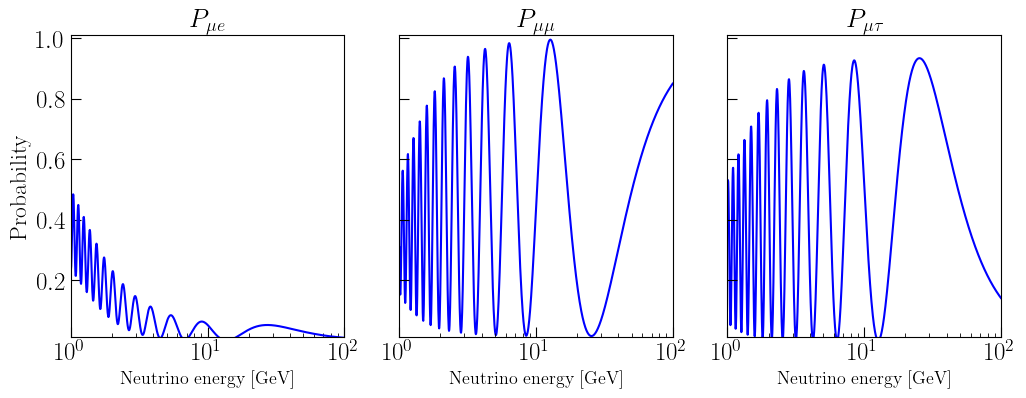

In [25]:
fig, ax = plt.subplots(1,3,figsize=(12,4), sharey=True, squeeze=True)
ax[0].axisbelow = True


ax[0].plot(E_range, Pme_vac,c='b', linestyle='solid' )


ax[1].plot(E_range, Pmm_vac,c='b', linestyle='solid')

ax[2].plot(E_range, Pmt_vac,c='b', linestyle='solid' )

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

ax[0].set_ylim((0.01,1.01))
ax[0].set_xlim((E_range.min(),E_range.max()))
ax[1].set_xlim((E_range.min(),E_range.max()))
ax[2].set_xlim((E_range.min(),E_range.max()))
ax[0].set_ylabel('Probability',fontsize=17)
ax[0].set_title(r'$P_{\mu e}$',fontsize=19)
ax[0].set_title(r'$P_{\mu e}$',fontsize=19)
ax[1].set_title(r'$P_{\mu \mu}$',fontsize=19)
ax[2].set_title(r'$P_{\mu \tau}$',fontsize=19)

ax[0].set_xlabel(r'Neutrino energy [GeV]',fontsize=13)
ax[1].set_xlabel(r'Neutrino energy [GeV]',fontsize=13)
ax[2].set_xlabel(r'Neutrino energy [GeV]',fontsize=13)


ax[1].set_axisbelow(False)
ax[2].set_axisbelow(False)

ax[0].tick_params(axis='both', direction='in', which='both', length = 7, labelsize=18)
ax[0].tick_params(which='minor', length=3)
ax[1].tick_params(axis='both', direction='in', which='both', length = 7, labelsize=18)
ax[1].tick_params(which='minor', length=3)
ax[2].tick_params(axis='both', direction='in', which='both', length = 7, labelsize=18)
ax[2].tick_params(which='minor', length=3)
fig.savefig(f'thesis/tex/figures/vac_osc.pdf')

ValueError: x and y must have same first dimension, but have shapes (1000,) and (500,)

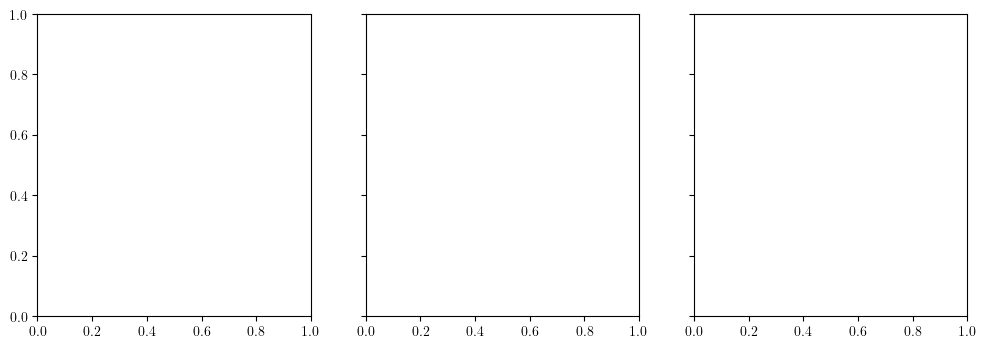

In [26]:
fig, ax = plt.subplots(1,3,figsize=(12,4), sharey=True, squeeze=True)
ax[0].axisbelow = True

ax[0].plot(E_range, Pme_an,c='b')
ax[0].plot(E_range, Pme,c='k', linestyle='solid' )

ax[1].plot(E_range, Pmm_an,c='b', label=r'$2\nu \text{ matter}$')
ax[1].plot(E_range, Pmm,c='k', linestyle='solid', label=r'$3\nu \text{ matter}$' )

ax[2].plot(E_range, Pmt_an,c='b')
ax[2].plot(E_range, Pmt,c='k', linestyle='solid' )

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

ax[0].set_ylim((0.01,1.01))
ax[0].set_xlim((E_range.min(),E_range.max()))
ax[1].set_xlim((E_range.min(),E_range.max()))
ax[2].set_xlim((E_range.min(),E_range.max()))
ax[0].set_ylabel('Probability',fontsize=17)
ax[0].set_title(r'$P_{\mu e}$',fontsize=19)
ax[0].set_title(r'$P_{\mu e}$',fontsize=19)
ax[1].set_title(r'$P_{\mu \mu}$',fontsize=19)
ax[2].set_title(r'$P_{\mu \tau}$',fontsize=19)

ax[0].set_xlabel(r'Neutrino energy [GeV]',fontsize=13)
ax[1].set_xlabel(r'Neutrino energy [GeV]',fontsize=13)
ax[2].set_xlabel(r'Neutrino energy [GeV]',fontsize=13)


ax[0].tick_params(axis='both', direction='in', which='both', labelsize=18, width = 1, length = 7)

ax[1].tick_params(axis='both', direction='in', which='both', labelsize=18, width = 1, length = 7)
ax[2].tick_params(axis='both', direction='in', which='both', labelsize=18, width = 1, length = 7)
ax[0].tick_params(which='minor', length=3)
ax[1].tick_params(which='minor', length=3)
ax[2].tick_params(which='minor', length=3)
ax[0].set_axisbelow(False)
ax[1].set_axisbelow(False)
ax[2].set_axisbelow(False)
ax[1].legend(loc='upper right', fontsize=15, ncol = 2, bbox_to_anchor=(1, -0.15))
#fig.savefig(f'thesis/tex/figures/2_vs_3.png', dpi=300, bbox_inches='tight')

In [62]:
from functions import V, r_earth, dm
dm(3,1, nufit_params_nsi)*np.cos(2*nufit_params_nsi['theta_13']) / V(r_earth-1)[0]/1e18

62.32606007640331

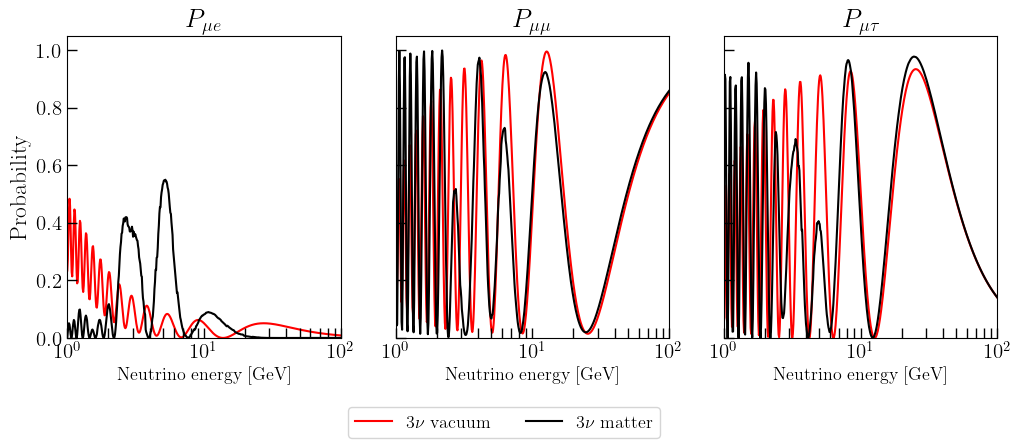

In [43]:
fig, ax = plt.subplots(1,3,figsize=(12,4), sharey=True, squeeze=True)
ax[0].axisbelow = True

ax[0].plot(E_range, Pme_vac,c='r')
ax[0].plot(E_range, Pme,c='k', linestyle='solid' )

ax[1].plot(E_range, Pmm_vac,c='r', label=r'$3\nu \text{ vacuum}$')
ax[1].plot(E_range, Pmm,c='k', linestyle='solid', label=r'$3\nu \text{ matter}$' )

ax[2].plot(E_range, Pmt_vac,c='r')
ax[2].plot(E_range, Pmt,c='k', linestyle='solid' )

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

ax[0].set_ylim((-0,1.05))
ax[0].set_xlim((E_range.min(),E_range.max()))
ax[1].set_xlim((E_range.min(),E_range.max()))
ax[2].set_xlim((E_range.min(),E_range.max()))
ax[0].set_ylabel('Probability',fontsize=17)
ax[0].set_title(r'$P_{\mu e}$',fontsize=19)
ax[0].set_title(r'$P_{\mu e}$',fontsize=19)
ax[1].set_title(r'$P_{\mu \mu}$',fontsize=19)
ax[2].set_title(r'$P_{\mu \tau}$',fontsize=19)

ax[0].set_xlabel(r'Neutrino energy [GeV]',fontsize=13)
ax[1].set_xlabel(r'Neutrino energy [GeV]',fontsize=13)
ax[2].set_xlabel(r'Neutrino energy [GeV]',fontsize=13)


ax[0].tick_params(axis='both', direction='in', which='both', labelsize=15, width = 1, length = 7, zorder=200)
ax[1].tick_params(axis='both', direction='in', which='both', labelsize=15, width = 1, length = 7, zorder=20)
ax[2].tick_params(axis='both', direction='in', which='both', labelsize=15, width = 1, length = 7, zorder=20)
ax[0].set_axisbelow(False)
ax[1].set_axisbelow(False)
ax[2].set_axisbelow(False)
ax[1].legend(loc='upper right', fontsize=13, ncol = 2, bbox_to_anchor=(1, -0.2))
fig.savefig(f'thesis/tex/figures/vac_vs_matter.png', bbox_inches='tight')

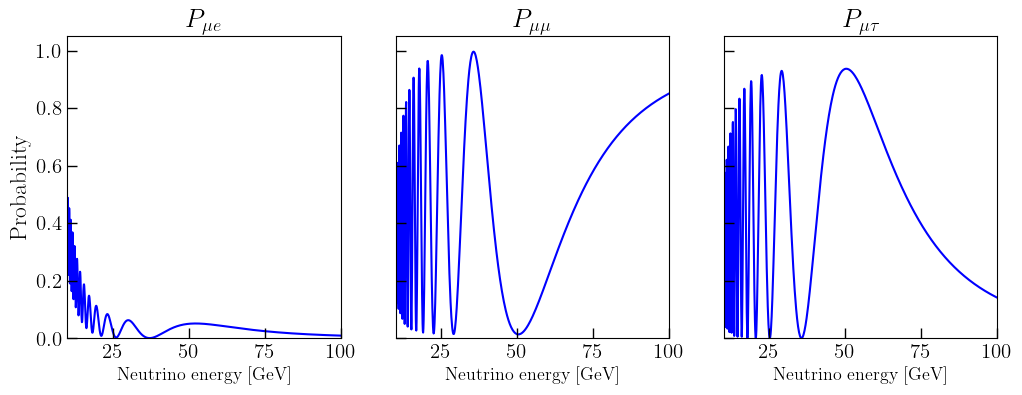

In [10]:
from analytical import P_an
Pme = P_an('m','e','E',params = nufit_params_nsi, param_min = 1, param_max = 1e2, L=2*r_earth)
Pmm = P_an('m','m','E',params = nufit_params_nsi, param_min = 1, param_max = 1e2, L=2*r_earth)
Pmt = P_an('m','t','E',params = nufit_params_nsi, param_min = 1, param_max = 1e2, L=2*r_earth)

fig, ax = plt.subplots(1,3,figsize=(12,4), sharey=True, squeeze=True)
ax[0].axisbelow = True
ax[0].plot(np.logspace(1,2,500), Pme,c='b')
ax[1].plot(np.logspace(1,2,500), Pmm,c='b')
ax[2].plot(np.logspace(1,2,500), Pmt,c='b')

#ax[0].set_xscale('log')
#ax[1].set_xscale('log')
#ax[2].set_xscale('log')

ax[0].set_ylim((-0,1.05))
ax[0].set_xlim((1e1,1e2))
ax[1].set_xlim((1e1,1e2))
ax[2].set_xlim((1e1,1e2))
ax[0].set_ylabel('Probability',fontsize=17)
ax[0].set_title(r'$P_{\mu e}$',fontsize=19)
ax[1].set_title(r'$P_{\mu \mu}$',fontsize=19)
ax[2].set_title(r'$P_{\mu \tau}$',fontsize=19)

ax[0].set_xlabel(r'Neutrino energy [GeV]',fontsize=13)
ax[1].set_xlabel(r'Neutrino energy [GeV]',fontsize=13)
ax[2].set_xlabel(r'Neutrino energy [GeV]',fontsize=13)


ax[0].tick_params(axis='both', direction='in', which='both', labelsize=15, width = 1, length = 7, zorder=200)
ax[1].tick_params(axis='both', direction='in', which='both', labelsize=15, width = 1, length = 7, zorder=20)
ax[2].tick_params(axis='both', direction='in', which='both', labelsize=15, width = 1, length = 7, zorder=20)
ax[0].set_axisbelow(False)
ax[1].set_axisbelow(False)
ax[2].set_axisbelow(False)

#savethesis(fig, 'two_osc')

In [ ]:
import sys,os
import numpy as np
os.chdir('../')
sys.path.append('./src/data')
sys.path.append('./src/events')
sys.path.append('./src/probability')
from src.probability.numerical import P_num_over_E
from src.probability.functions import dc_params_nsi
Pmx = P_num_over_E('m', [50], nsi=True, params = dc_params_nsi)
Pme = Pmx[1]

eem_range = np.linspace(-0.3,0.3,29)
eet_range = np.linspace(-0.3,0.3,29)
E_range = [5, 25, 50]
param_list = []
for eet in eet_range:
    for eem in eem_range:
        dicta = dc_params_nsi.copy()
        dicta.update({'e_em': eem, 'e_et': eet})
        param_list.append(dicta)
Pme = []
Pme_SI = P_num_over_E('m', E_range, nsi=False, params = dc_params_nsi)[0,:]
for p in param_list:
    prob = P_num_over_E('m', E_range, nsi=True, params = p)[0,:] - Pme_SI
    Pme.append(prob)
Pme = np.array(Pme).reshape(len(eem_range), len(eet_range), len(E_range))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib 
from src.plotter import savethesis
from matplotlib.colors import CenteredNorm
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{siunitx,physics}')

fig, ax = plt.subplots(1,3, figsize=(12,4), sharey=True)
titles = [r'$\SI{5}{\GeV}$', r'$\SI{25}{\GeV}$', r'$\SI{50}{\GeV}$']

for i in range(len(E_range)):
    if i == 0:
        im = ax[0].pcolormesh(np.abs(Pme[:,:,0].T), cmap='Oranges', vmax=0.5,vmin=0)
    else:
        im = ax[i].pcolormesh(np.abs(Pme[:,:,i].T), cmap='Oranges', vmax=0.5,vmin=0)
    ax[i].tick_params(axis='both', direction='in', which='both', labelsize=15, width = 1, length = 4, zorder=20)
    ax[i].set_xlabel(r'$\epsilon_{e\mu}$', fontsize=30)
    ax[0].set_ylabel(r'$\epsilon_{e\tau}$', fontsize=30)
    ax[i].set_title(titles[i], fontsize=20)
    _=ax[i].set_xticklabels(np.round(eem_range[::11],2))
    _=ax[i].set_yticklabels(np.round(eet_range[::5],2))

    ax[i].xaxis.get_major_formatter()._usetex = True
    ax[i].yaxis.get_major_formatter()._usetex = True
cbar = plt.colorbar(im, ax = ax[2], norm = CenteredNorm(0))
cbar.set_label(r'$\abs{P_{\mu e}^{NSI} - P_{\mu e}^{SI}}$', fontsize=25)
cbar.ax.tick_params(labelsize=15)
    
#plt.suptitle('$P_{NSI} - P_{SI}$', fontsize=15)
plt.tight_layout()

savethesis(fig,'eem_eet_prob.pdf')